**Key Python Libraries for Data Analysis & ML**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Added comma between imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# df_train.csv and df_test.csv are dataset files
df_train = pd.read_csv(r"C:\Users\Bhushan\Downloads\CREDIT CARD FRAUD DETECTION\fraudTrain.csv")
df_test = pd.read_csv(r"C:\Users\Bhushan\Downloads\CREDIT CARD FRAUD DETECTION\fraudTest.csv")


In [7]:
df_train.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**EDA**

In [8]:
df_train.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
print(df_train.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [14]:
print(df_train.duplicated().sum())

0


**Distribution of Fraudulent vs. Legitimate Transactions**

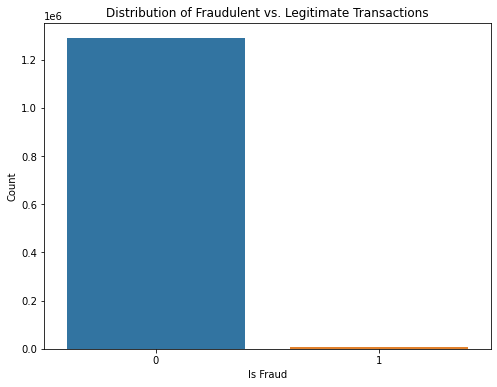

In [16]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a count plot using seaborn
sns.countplot(x='is_fraud', data=df_train)

# Set the title of the plot
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')

# Set the label for the x-axis
plt.xlabel('Is Fraud')

# Set the label for the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()


**Relationship between Transaction Amount and Fraud**

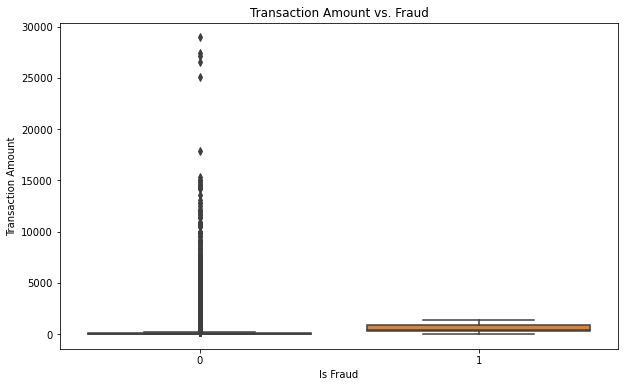

In [18]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot using seaborn to visualize the distribution of transaction amount by fraud status
sns.boxplot(x='is_fraud', y='amt', data=df_train)

# Set the title of the plot
plt.title('Transaction Amount vs. Fraud')

# Set the label for the x-axis
plt.xlabel('Is Fraud')

# Set the label for the y-axis
plt.ylabel('Transaction Amount')

# Display the plot
plt.show()


<AxesSubplot:xlabel='gender', ylabel='count'>

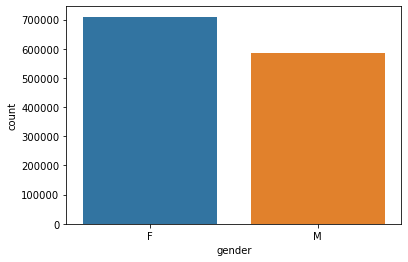

In [20]:
# Create a count plot using seaborn to visualize the distribution of gender
sns.countplot(x=df_train.gender)

**Relationship between Gender and Fraud**

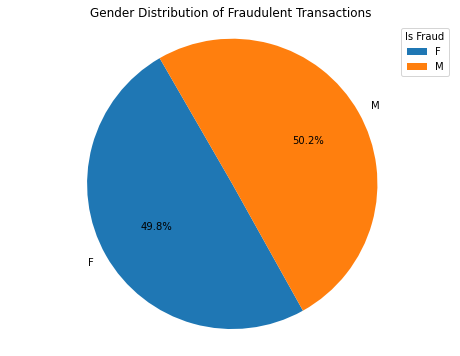

In [22]:
# Group the DataFrame by 'gender' and 'is_fraud', and count the occurrences of each combination
gender_fraud_counts = df_train.groupby(['gender', 'is_fraud']).size().unstack()

# Create a pie chart to visualize the distribution of fraudulent transactions across genders
plt.figure(figsize=(8, 6))

# Create the pie chart using the counts of fraudulent transactions (where 'is_fraud' is 1)
plt.pie(gender_fraud_counts[1], labels=gender_fraud_counts.index, autopct='%1.1f%%', startangle=120)

# Set the title of the plot
plt.title('Gender Distribution of Fraudulent Transactions')

# Set the aspect ratio to be equal to ensure a circular pie
plt.axis('equal')

# Add a legend to indicate the categories ('Is Fraud') and their respective labels ('gender')
plt.legend(title='Is Fraud', loc='upper right')

# Display the plot
plt.show()


**Splitiing the data**

In [25]:
# Prepare training data:
# Drop columns that are not features and set X_train (features) and y_train (target)
X_train = df_train.drop(['is_fraud', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
y_train = df_train['is_fraud']

# Prepare testing data:
# Drop columns that are not features and set X_test (features) and y_test (target)
X_test = df_test.drop(['is_fraud', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
y_test = df_test['is_fraud']

In [27]:
# Initialize a LabelEncoder object to convert categorical values to numerical labels
le = LabelEncoder()

# Encode the 'gender' column in the training data (X_train) by fitting and transforming it
X_train['gender'] = le.fit_transform(X_train['gender'])

# Encode the 'gender' column in the testing data (X_test) using the same LabelEncoder object
# This ensures consistent encoding between training and testing data
X_test['gender'] = le.transform(X_test['gender'])


In [32]:
# Initialize a StandardScaler object to standardize the features
scaler = StandardScaler()

# Fit and transform the training data (X_train) using the scaler
# This computes the mean and standard deviation of each feature and then scales the features accordingly
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (X_test) using the same scaler
# This ensures that the same scaling factors (mean and standard deviation) are applied to the testing data
x_test_scaled = scaler.transform(X_test)


**Logistic Regression**

In [35]:
# Initialize a LogisticRegression model
lr_model = LogisticRegression()

# Fit the logistic regression model to the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the scaled testing data
lr_predictions = lr_model.predict(x_test_scaled)

# Calculate the accuracy of the logistic regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Print the accuracy of the logistic regression model
print("Logistic Regression Accuracy:", lr_accuracy)

# Print the classification report, which includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.9955193182165807
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



**Decision Tree**

In [37]:
# Initialize a DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# Fit the decision tree model to the training data
dt_model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
dt_predictions = dt_model.predict(X_test)

# Calculate the accuracy of the decision tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Print the accuracy of the decision tree model
print("Decision Tree Accuracy:", dt_accuracy)

# Print the classification report, which includes precision, recall, F1-score, and support for each class
print(classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.9852263464088865
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.08      0.28      0.13      2145

    accuracy                           0.99    555719
   macro avg       0.54      0.63      0.56    555719
weighted avg       0.99      0.99      0.99    555719



**Random Forest**

In [38]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9956776716290068
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.30      0.09      0.13      2145

    accuracy                           1.00    555719
   macro avg       0.65      0.54      0.57    555719
weighted avg       0.99      1.00      0.99    555719



**Model Evaluation**

**Upon comparison, although the accuracy of the three models is similar, Logistic Regression emerges as the superior choice.**